In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/gm2offline_ana_18236461_1544537266.1865.root")
f.cd("SimuTreeMaker")
f.ls()

TFile**		./data/gm2offline_ana_18236461_1544537266.1865.root	
 TFile*		./data/gm2offline_ana_18236461_1544537266.1865.root	
  TDirectoryFile*		SimuTreeMaker	SimuTreeMaker (SimuTreeMaker) folder
   KEY: TTree	gm2ringsimTree;4	gm2ringsimTree
   KEY: TTree	gm2ringsimTree;3	gm2ringsimTree
  KEY: TDirectoryFile	SimuTreeMaker;1	SimuTreeMaker (SimuTreeMaker) folder


In [4]:
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries :   392000 : Total =       233308624 bytes  File  Size =  101487426 *
*        :          : Tree compression factor =   2.30                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries :   392000 : Total  Size=    1570163 bytes  File Size  =      10129 *
*Baskets :       18 : Basket Size=    1039872 bytes  Compression= 154.95     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries :   392000 : Total  Size=    1570229 bytes  File Size  =      10180 *
*Baskets :       18 : Basket Size=    1039872 bytes  Compression= 154.18     *
*...............................................

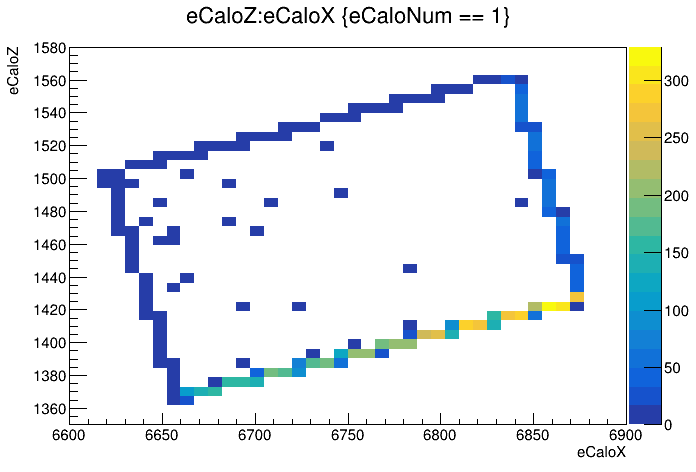

In [114]:
c = r.TCanvas()
t.Draw("eCaloZ:eCaloX","eCaloNum == 1","colz")
c.Draw()

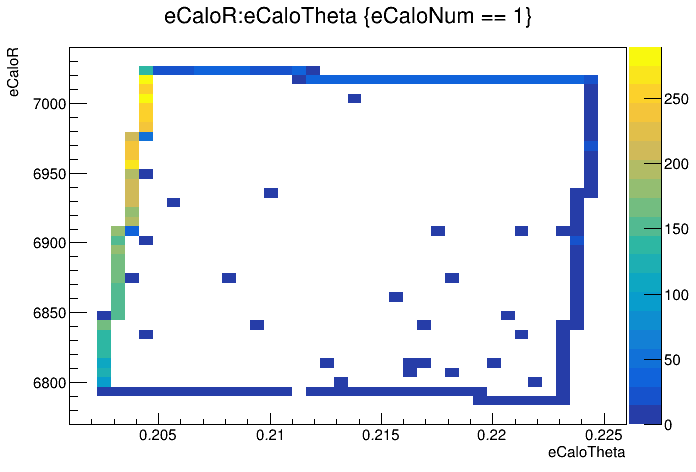

In [119]:
c = r.TCanvas()
t.Draw("eCaloR:eCaloTheta","eCaloNum == 1","colz")
c.Draw()

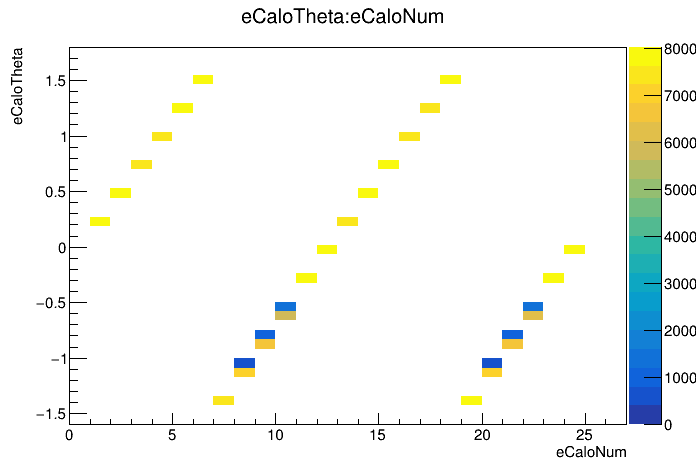

In [124]:
c = r.TCanvas()
t.Draw("eCaloTheta:eCaloNum","","colz")
c.Draw()

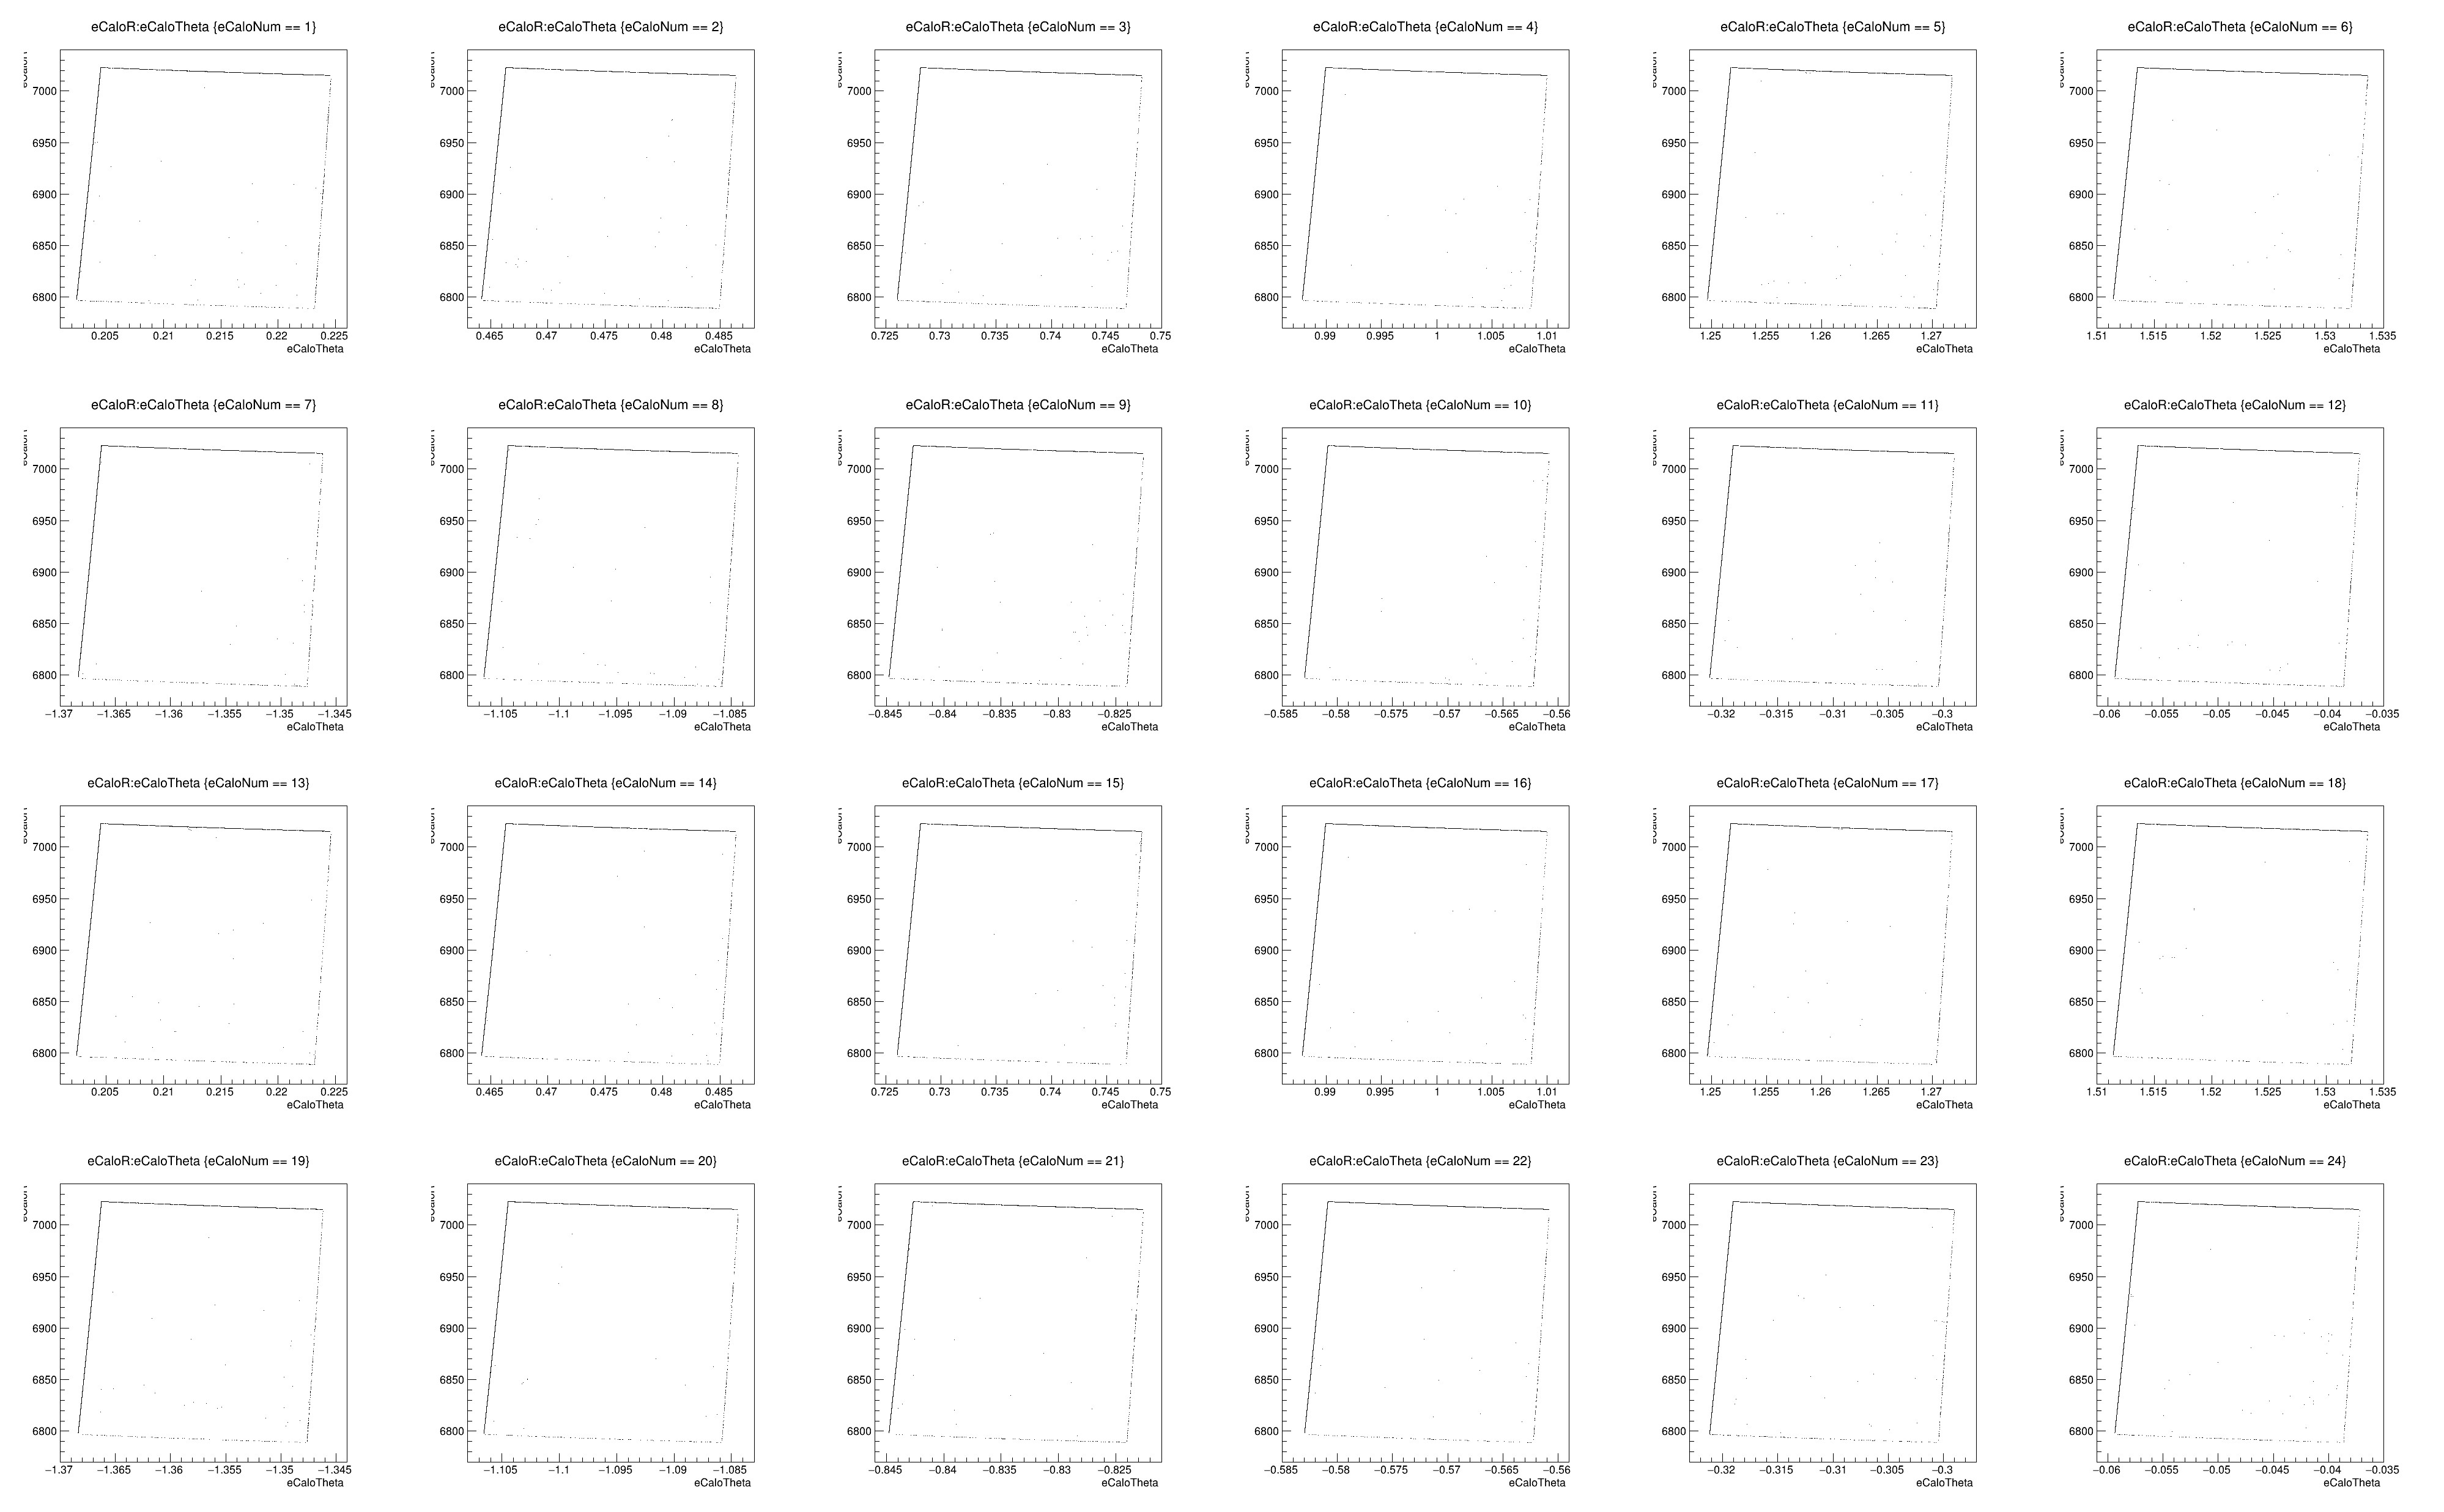

In [118]:
c = r.TCanvas("c","c",4000,2500)
c.Divide(6,4)
for calo in range(1,25):
    c.cd(calo)
    t.Draw("eCaloR:eCaloTheta","eCaloNum == "+str(calo))
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


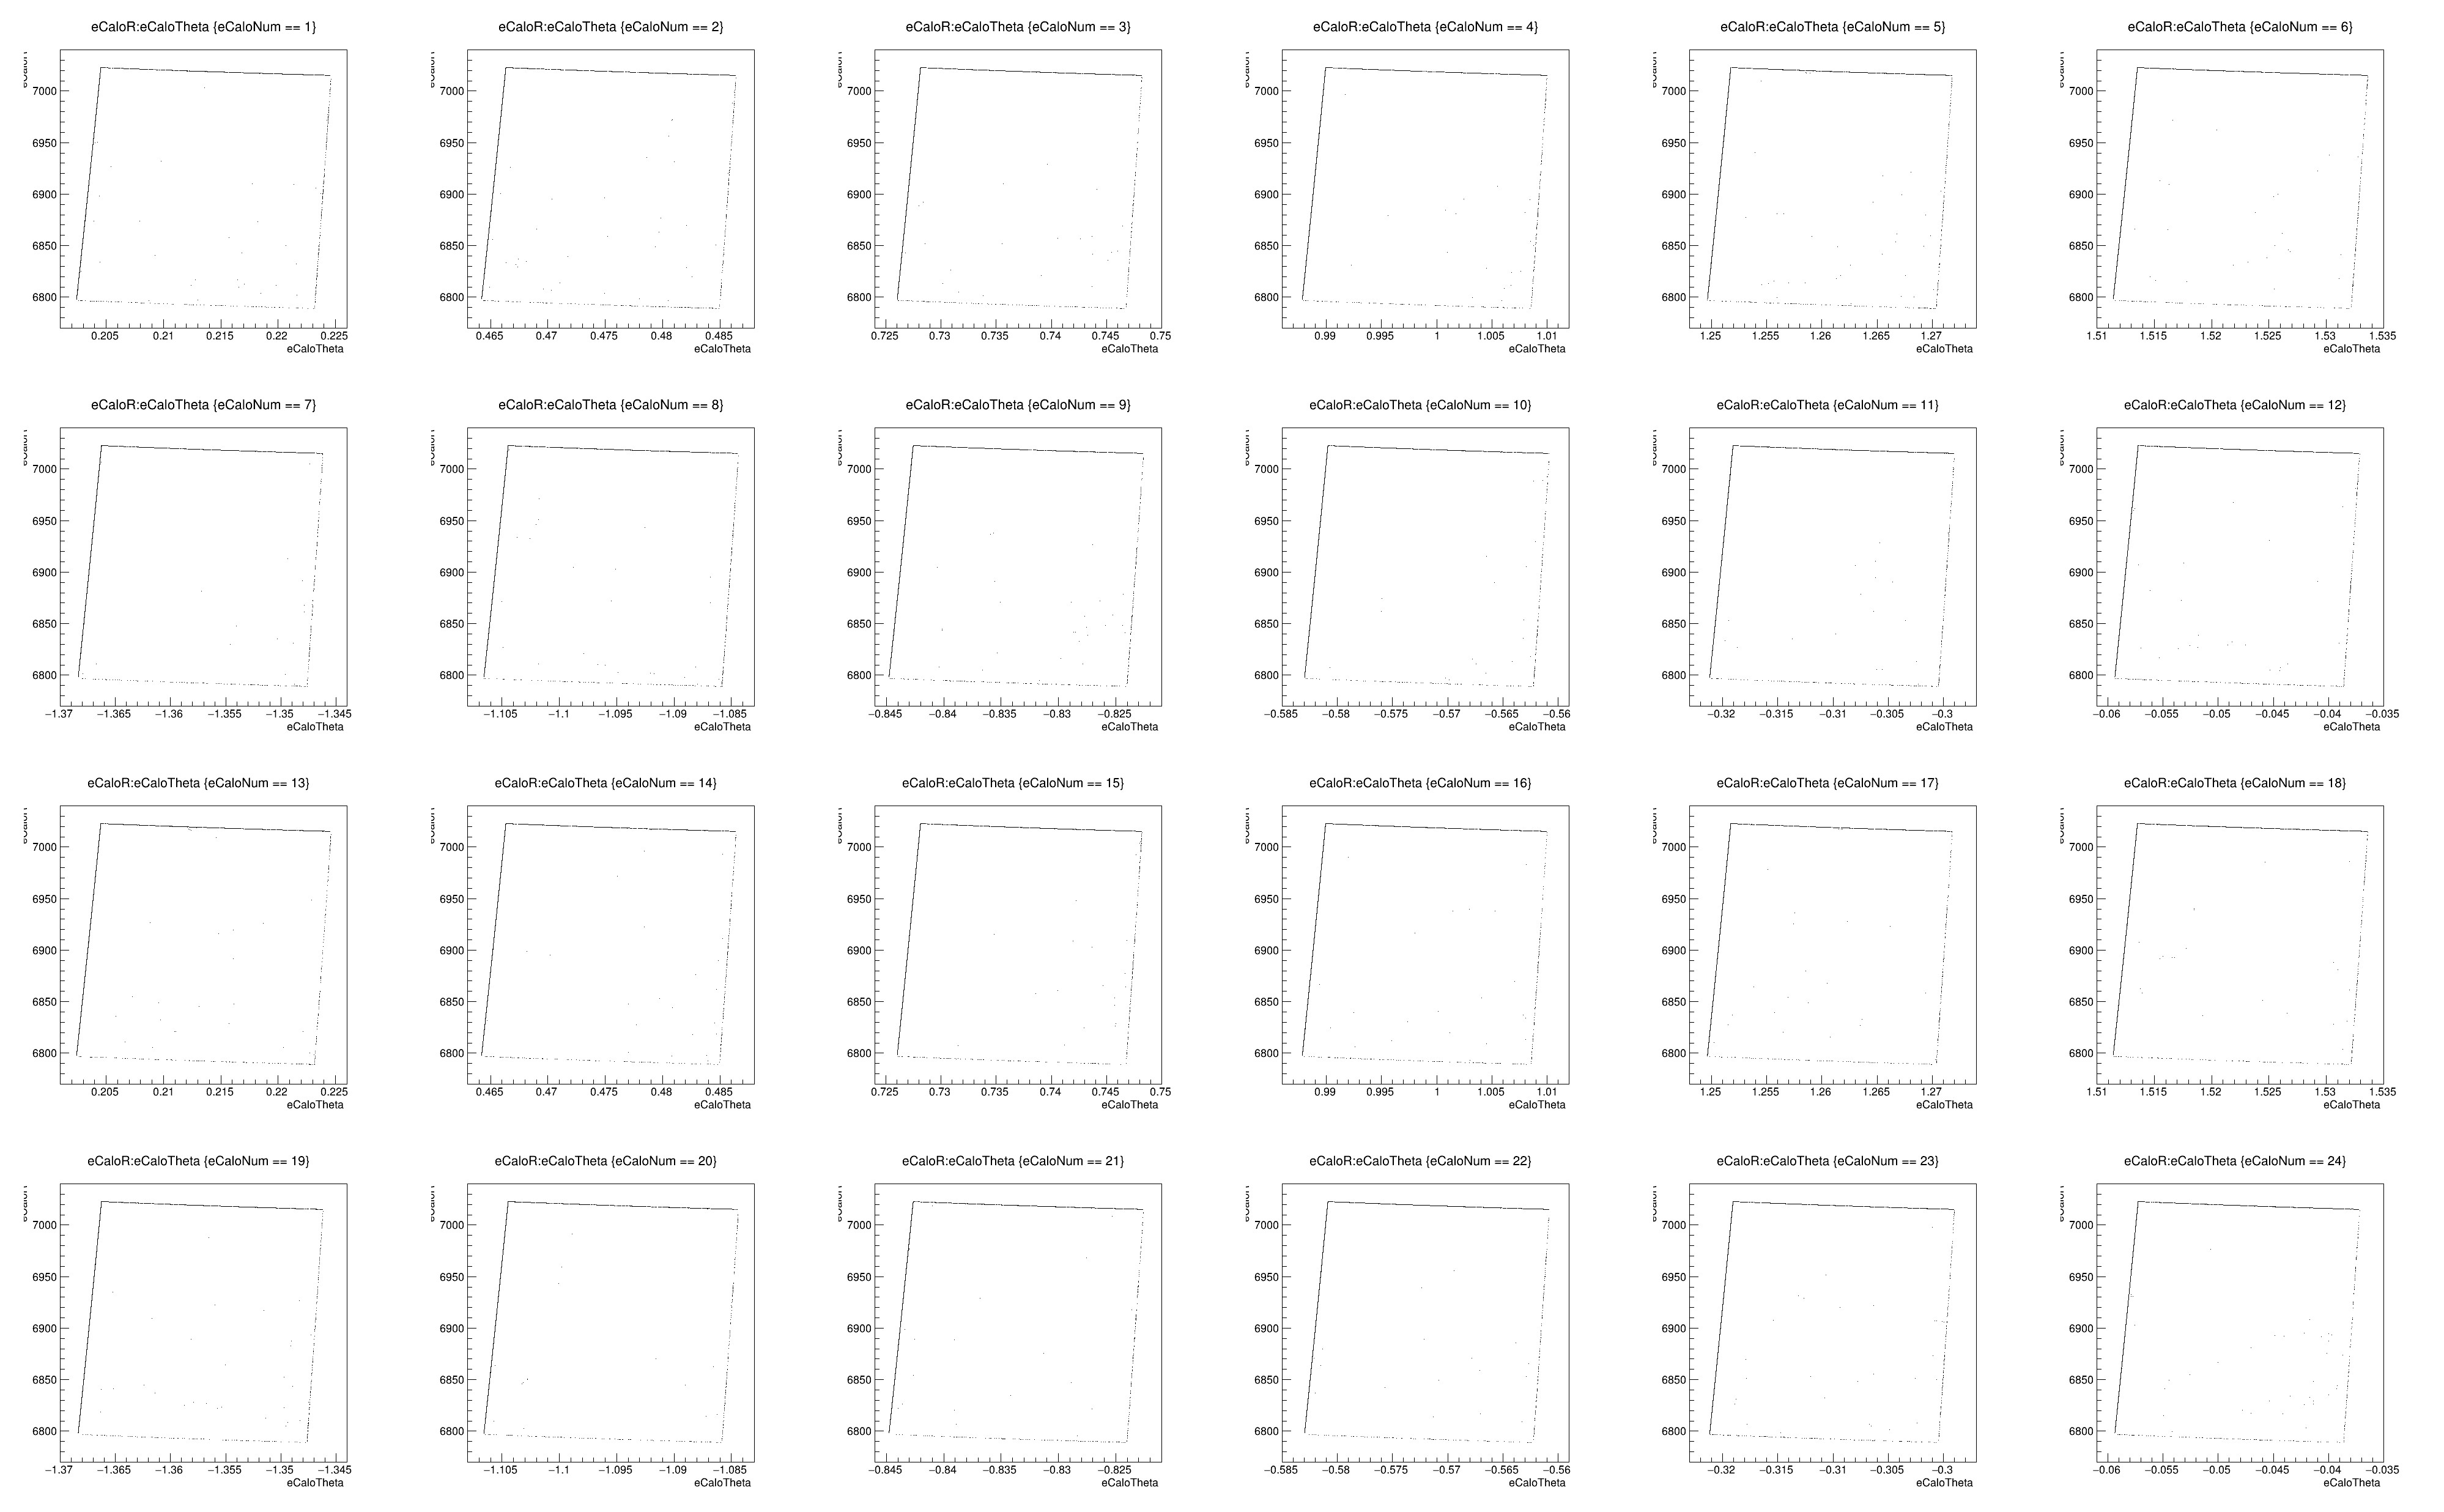

In [121]:
c = r.TCanvas("c","c",4000,2500)
c.Divide(6,4)
for calo in range(1,25):
    c.cd(calo)
    t.Draw("eCaloR:eCaloTheta","eCaloNum == "+str(calo))
c.Draw()

In [100]:
counter = 0
posVec = []
energyVec = []
caloNum = 1
for i, e in enumerate(t):
    if counter > 10000:
        break
    if (len(e.eCaloE) > 0) and (e.eCaloNum[0] == caloNum):
        counter += 1
        #print([x for x in e.eCaloNum])
        allSameCalo = True
        for x in e.eCaloNum:
            if x != caloNum:
                allSameCalo = False
        if(allSameCalo):
            positions = [ [x for x in e.eCaloX], [x for x in e.eCaloY], [x for x in e.eCaloZ] ] 
            ei = [x for x in e.eCaloE]
            posVec.append(positions)
            energyVec.append(ei)
        else:
            counter -= 1

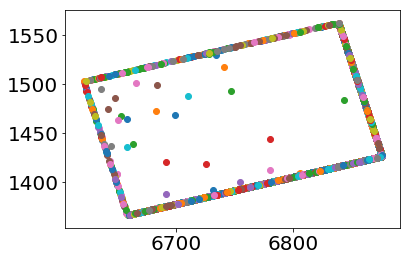

In [101]:
fig,ax = plt.subplots()
for (xVec, yVec, zVec) in posVec:
    ax.scatter(xVec, zVec)
plt.show()

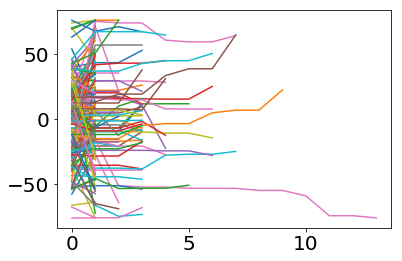

In [102]:
fig,ax = plt.subplots()
for (xVec, yVec, zVec) in posVec:
    plt.plot(yVec)
plt.show()

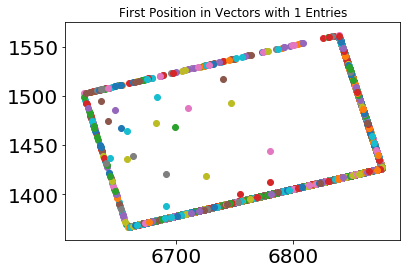

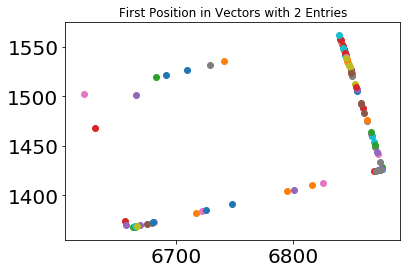

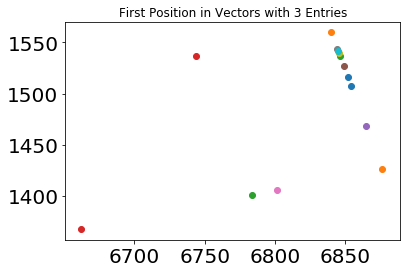

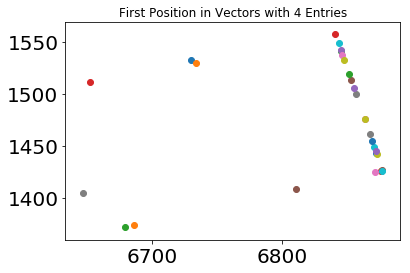

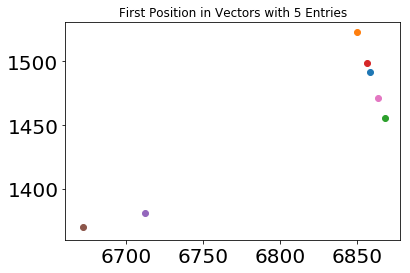

In [103]:
for i in range(5):
    fig,ax = plt.subplots()
    plt.title("First Position in Vectors with "+str(i+1)+" Entries")
    for (xVec, yVec, zVec) in posVec:
        if(len(xVec) == (i+1)):
            ax.scatter(xVec[0], zVec[0])
    plt.show()

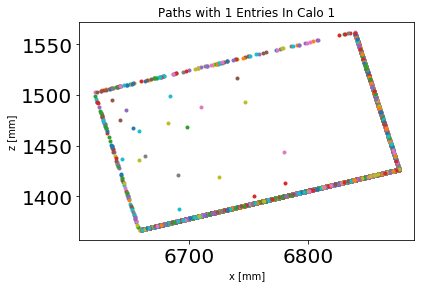

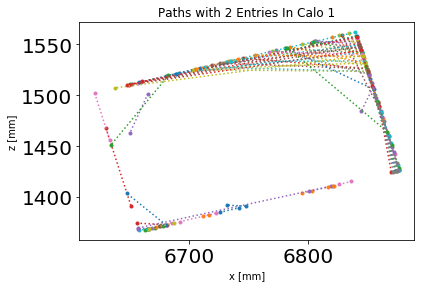

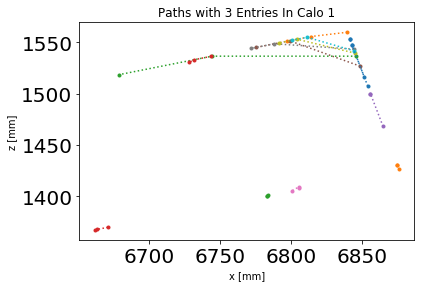

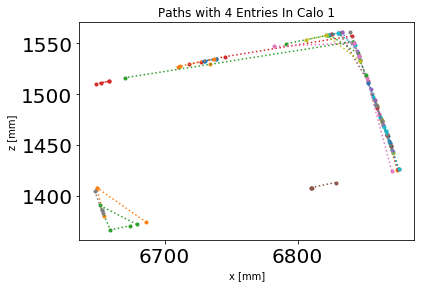

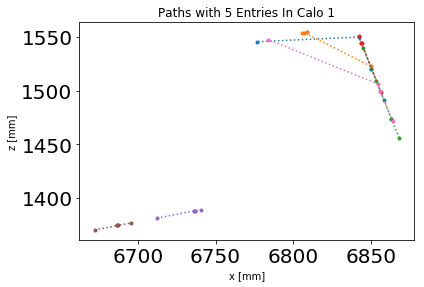

In [126]:
for i in range(5):
    fig,ax = plt.subplots()
    plt.ylabel("z [mm]")
    plt.xlabel("x [mm]")
    plt.title("Paths with "+str(i+1)+" Entries In Calo 1")
    for (xVec, yVec, zVec) in posVec:
        if(len(xVec) == (i+1)):
            ax.plot(xVec, zVec, ".:")
    plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


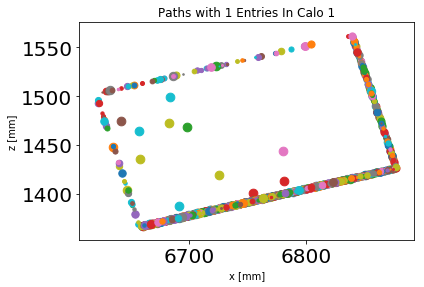

In [128]:
for i in range(1):
    fig,ax = plt.subplots()
    plt.ylabel("z [mm]")
    plt.xlabel("x [mm]")
    plt.title("Paths with "+str(i+1)+" Entries In Calo 1")
    for (xVec, yVec, zVec) in posVec:
        if(len(xVec) == (i+1)):
            ax.scatter(xVec, zVec, yVec)
    plt.show()

---

# Energies

In [48]:
counter = 0
energyVec = []
for i, e in enumerate(t):
    if counter > 100:
        break
    if (len(e.eCaloE) > 3) and (e.eCaloNum[0] == 1):
        counter += 1
        ei = [x for x in e.eCaloE]
        energyVec.append(ei)

Lets first just plot these normally

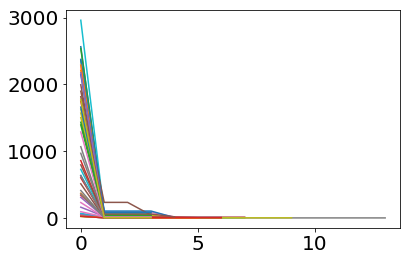

In [49]:
for i, ei in enumerate(energyVec):
    plt.plot(ei,label=str(i))
plt.show()

And now normalize to the energy of the first point

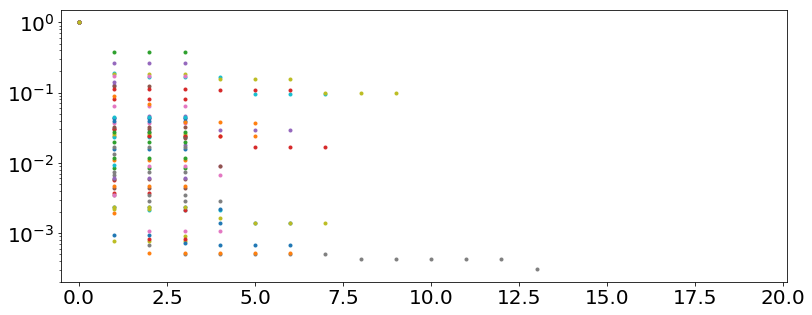

In [50]:
fig,ax = plt.subplots(figsize=(13,5))
for i, ei in enumerate(energyVec):
    eb = [x/ei[0] for x in ei]
    plt.plot(eb,".",label=str(i))
plt.yscale("log")
plt.xlim(-0.5,20.1)
plt.show()